In [ ]:
!pip install -Uqq fastbook fastai

In [ ]:
from fastbook import *
from fastai.text.all import *
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [ ]:
set_seed(42)

In [ ]:
#path = Path("/content/drive/MyDrive/indoULMFiT/")
#count_vocab = pickle.load(open(path/"data_tok/counter.pkl", "rb"))
#voc = make_vocab(count_vocab)

In [ ]:
#length_vocab = pickle.load(open(path/"data_tok/lengths.pkl", "rb"))

In [ ]:
!tar -xvf /content/drive/MyDrive/indoULMFiT/data-tok.tar

In [ ]:
!mkdir /content/home/data/
!mkdir /content/home/data/models/

In [ ]:
!mkdir /content/home/data/wiki/

In [ ]:
!cp /content/drive/MyDrive/indoULMFiT/data/models/8epoch.pth .

In [ ]:
!mv ./8epoch.pth ./home/data/models/8epoch.pth

In [ ]:
%cd /content/home/data_tok/wiki/
!find . -name '*.txt' | xargs cp --target-directory=/content/home/data/wiki/

In [ ]:
path = Path("/content/home/data/")

In [ ]:
set_seed(42)
torch.backends.cudnn.deterministic = True
get_corp = partial(get_text_files, folders=['wiki'])
dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_corp, splitter=RandomSplitter(0.1, seed=42)
).dataloaders(path, path=path, bs=64, seq_len=72, verbose=True)

Found 500000 items
2 datasets of sizes 450000,50000
Setting up Pipeline: Tokenizer -> Numericalize
Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: 


In [ ]:
set_seed(42)
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()], pretrained=False).to_fp16()

In [ ]:
learn.model.cuda()

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60008, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60008, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60008, bias=True)
    (output_dp): RNNDropout()
  )
)

In [ ]:
learn.summary()

SequentialRNN (Input shape: 64 x 72)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 72 x 1152      
LSTM                                                           
LSTM                                                           
____________________________________________________________________________
                     64 x 72 x 400       
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
____________________________________________________________________________
                     64 x 72 x 60008     
Linear                                    24063208   True      
RNNDropout                                                     
____________________________________________________________________________

Total params: 24,063,208
Tota

### 2 epoch

SuggestedLRs(valley=0.00019054606673307717)

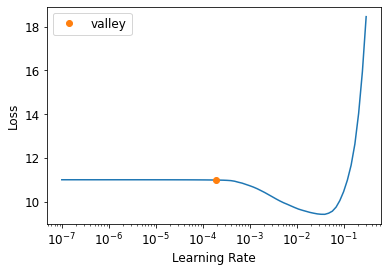

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.00019, wd=0.1, cbs=SaveModelCallback(fname='2epoch', at_end=True))

epoch,train_loss,valid_loss,accuracy,perplexity,time


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,6.945842,6.914734,0.319238,1007.002991,2:54:43
1,6.820812,6.749188,0.334513,853.365906,2:56:32


Better model found at epoch 0 with valid_loss value: 6.91473388671875.
Better model found at epoch 1 with valid_loss value: 6.749188423156738.


### 4 epoch

In [ ]:
learn.load('2epoch')

SuggestedLRs(valley=0.00363078061491251)

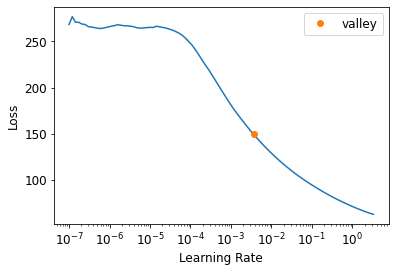

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.00363, wd=0.1, cbs=SaveModelCallback(fname='4epoch',at_end=True))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.468901,3.534603,0.392542,34.281406,2:38:45


Better model found at epoch 0 with valid_loss value: 3.5346031188964844.


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.468901,3.534603,0.392542,34.281406,2:38:45
1,3.213583,3.184768,0.426920,24.161676,2:40:12


Better model found at epoch 1 with valid_loss value: 3.184767723083496.


### 6 epoch

In [ ]:
learn.load('4epoch')

SuggestedLRs(valley=0.0006918309954926372)

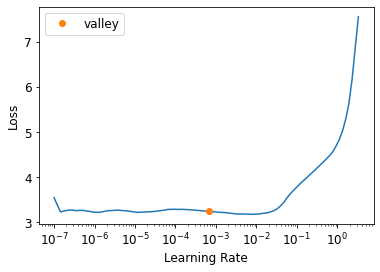

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.00069, wd=0.1, cbs=SaveModelCallback(fname='6epoch',at_end=True))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.217146,3.237561,0.420279,25.471508,2:51:47


Better model found at epoch 0 with valid_loss value: 3.237560510635376.


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.217146,3.237561,0.420279,25.471508,2:51:47
1,3.183827,3.138434,0.432237,23.067713,2:52:21


Better model found at epoch 1 with valid_loss value: 3.1384339332580566.


### 8 epoch

In [ ]:
learn.load('6epoch')

SuggestedLRs(valley=0.0008317637839354575)

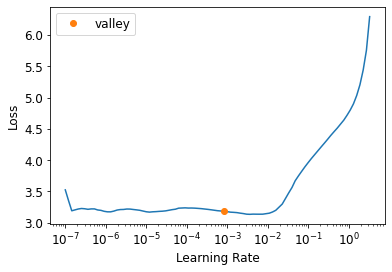

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.00083, wd=0.1, cbs=SaveModelCallback(fname='8epoch',at_end=True))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.257565,3.238612,0.419749,25.498316,2:38:48
1,3.139802,3.116995,0.434389,22.578421,2:39:10


Better model found at epoch 0 with valid_loss value: 3.238612413406372.
Better model found at epoch 1 with valid_loss value: 3.116994619369507.


### 10 epoch

In [ ]:
learn.load('8epoch')

SuggestedLRs(valley=0.0003311311302240938)

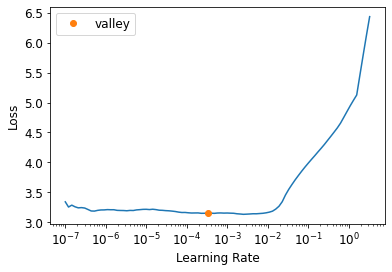

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.00033, wd=0.1, cbs=SaveModelCallback(fname='10epoch',at_end=True))

### 12 epoch

In [ ]:
learn.load('10epoch')

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.000229, wd=0.1, cbs=SaveModelCallback(fname='12epoch',at_end=True))

### 14 epoch

In [ ]:
learn.load('12epoch')

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.000229, wd=0.1, cbs=SaveModelCallback(fname='14epoch', at_end=True))

### 16 epoch

In [ ]:
learn.load('14epoch')

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(2, 0.000229, wd=0.1, cbs=SaveModelCallback(fname='16epoch', at_end=True))

### Save Models

In [ ]:
%cd /content/home/data/models 
!cp ./8epoch.pth /content/8epoch.pth

/content/home/data/models


In [ ]:
%cd /content/drive/MyDrive/indoULMFiT/data/models
!cp /content/8epoch.pth .

/content/drive/.shortcut-targets-by-id/1rr5EGn9QPWT3KfuBEeSC3QAsgTa9L_-z/indoULMFiT/data/models
